In [61]:
import re
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## [Data  Kaggle](https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset/data)

In [62]:
data_train = pd.read_csv('train.csv', encoding = 'latin1') 
data_test = pd.read_csv('test.csv', encoding = 'latin1')

In [63]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [64]:
data_train.head(1)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60


In [65]:
data_test.head(1)

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0


In [66]:
data_test.columns

Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'],
      dtype='object')

# Select ROI columns

In [67]:
roi = ['sentiment', 'text']
data_train = data_train[roi]
data_test = data_test[roi]

In [68]:
data = pd.concat([data_train, data_test], ignore_index=True)

# Cleaning operations

In [69]:
# discard null value
data = data.dropna()

In [70]:
# a check
print(f' Null values sentiment :{data.sentiment.isnull().sum()}')
print(f' Null values text :{data.text.isnull().sum()}')

 Null values sentiment :0
 Null values text :0


In [71]:
data.head(1)

,sentiment,text
0,neutral,"I`d have responded, if I were going"


In [72]:
data['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

# Exploring distribution of sentiment labels...

<Axes: xlabel='sentiment'>

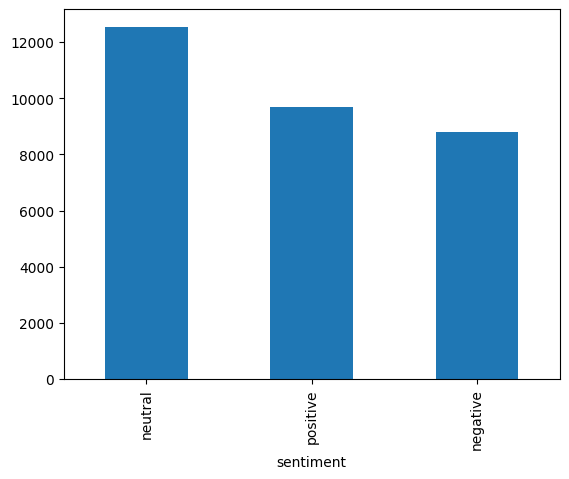

In [73]:
data['sentiment'].value_counts().plot(kind="bar")

### There are more neutral, so in order to create a balanced data, let's sampling

/tmp/ipykernel_18713/656222261.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop = True)))


<Axes: xlabel='sentiment'>

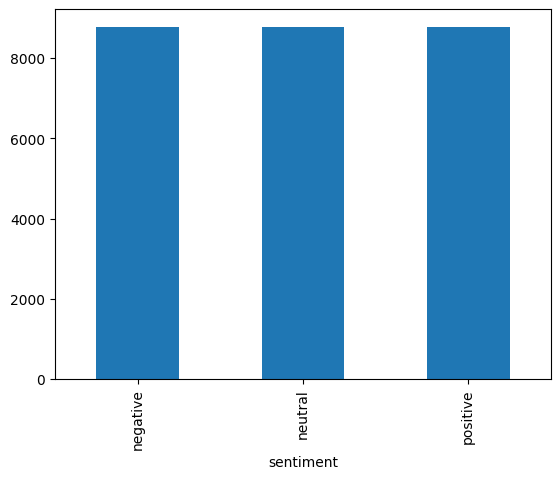

In [74]:
g = data.groupby('sentiment')
data = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop = True)))
data['sentiment'].value_counts().plot(kind = "bar")

# Remapping sentiment

| negative| neutral | positive|
|-|-|-|
| 0 | 1 | 2|

In [75]:
data['sentiment_int'] = LabelEncoder().fit_transform(data['sentiment'])
data.head()

sentiment                                               text  \
sentiment                                                                  
negative  0  negative  just got back from the ER... i cut myself whil...   
          1  negative   yeah i got ur text! well ive only been on sum...   
          2  negative                           _Hodges Yup. Their loss.   
          3  negative                                       Sunburn ouch   
          4  negative   you`re missing the devil wears prada!!!!! sad...   

             sentiment_int  
sentiment                   
negative  0              0  
          1              0  
          2              0  
          3              0  
          4              0

In [76]:
data[data.sentiment== 'negative'].head(1)

,,sentiment,text,sentiment_int
sentiment,,,,
negative,0,negative,just got back from the ER... i cut myself whil...,0


In [77]:
data[data.sentiment== 'neutral'].head(1)

,,sentiment,text,sentiment_int
sentiment,,,,
neutral,0,neutral,I have a job at camp!! Only downfall? No midn...,1


In [78]:
data[data.sentiment== 'positive'].head(1)

,,sentiment,text,sentiment_int
sentiment,,,,
positive,0,positive,Musashi`s? Has a great rep. Or did you go to ...,2


In [79]:
data = pd.DataFrame({
    "sentiment": data.sentiment_int.values,
    "text": data.text.values
})
data.head(2)

,sentiment,text
0,0,just got back from the ER... i cut myself whil...
1,0,yeah i got ur text! well ive only been on sum...


# Let's start the general cleaning

### #1. Removing emoji and lowering...

In [80]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [81]:
#remove emoji and set lowercase
data['text'] = data['text'].apply(lambda x: remove_emojis(x).lower())
data.head()

,sentiment,text
0,0,just got back from the er... i cut myself whil...
1,0,yeah i got ur text! well ive only been on sum...
2,0,_hodges yup. their loss.
3,0,sunburn ouch
4,0,you`re missing the devil wears prada!!!!! sad...


### #2.Before removing punctuation and special char: adding semantic info

In [82]:
#before removing punctuation insert esclamation
data['text'] = data.apply(lambda x: re.sub( r"!", ' exclamation ', x['text']),axis=1)
data.head()

,sentiment,text
0,0,just got back from the er... i cut myself whil...
1,0,yeah i got ur text exclamation well ive only...
2,0,_hodges yup. their loss.
3,0,sunburn ouch
4,0,you`re missing the devil wears prada exclamat...


In [83]:
#before removing punctuation insert question
data['text'] = data.apply(lambda x: re.sub( r"\?", ' question ', x['text'] ),axis=1)

In [84]:
# *** 
#update *** with censored
data['text'] = data.apply(lambda x: re.sub( r"\*{2,}", ' censored ', x['text']),axis=1)
data.head()

,sentiment,text
0,0,just got back from the er... i cut myself whil...
1,0,yeah i got ur text exclamation well ive only...
2,0,_hodges yup. their loss.
3,0,sunburn ouch
4,0,you`re missing the devil wears prada exclamat...


### #3.Remove url or email

In [85]:
#remove url or email
pattern = r"(https?://\S+|@[A-Za-z0-9]+|\b[a-z0-9._%+-]+@[a-z0-9.-]+\.[a-z]{2,})\b"
data['text'] = data.apply(lambda x: re.sub( pattern, '', x['text']),axis=1)
data.head()


,sentiment,text
0,0,just got back from the er... i cut myself whil...
1,0,yeah i got ur text exclamation well ive only...
2,0,_hodges yup. their loss.
3,0,sunburn ouch
4,0,you`re missing the devil wears prada exclamat...


### #4.Semplify interaction (ahahahah = ah)

In [86]:
#semplify interjections
data['text'] = data['text'].apply(lambda x: re.sub( r'a+h+', 'ah',x))
data['text'] = data['text'].apply(lambda x: re.sub( r'o+h+', 'oh',x))
data['text'] = data['text'].apply(lambda x: re.sub( r'u+h+','uh',x))
data.head()


,sentiment,text
0,0,just got back from the er... i cut myself whil...
1,0,yeah i got ur text exclamation well ive only...
2,0,_hodges yup. their loss.
3,0,sunburn ouch
4,0,you`re missing the devil wears prada exclamat...


### #5.Remove punctuation

In [87]:
#remove any punctuaction
data['text'] = data.apply(lambda x: re.sub( r"([^\w\s])", ' ', x['text'] ), axis=1)
data.head(3)

,sentiment,text
0,0,just got back from the er i cut myself whil...
1,0,yeah i got ur text exclamation well ive only...
2,0,_hodges yup their loss


### #6.Remove extra space

In [88]:
data.columns

Index(['sentiment', 'text'], dtype='object')

In [89]:
#remove extra space
pattern = r"\s+"
data['text'] = data.apply(lambda x: re.sub( pattern, ' ', x['text']),axis=1)
#data.drop(columns=['text_clean_nourl','text'], inplace=True)
data.head()

,sentiment,text
0,0,just got back from the er i cut myself while t...
1,0,yeah i got ur text exclamation well ive only ...
2,0,_hodges yup their loss
3,0,sunburn ouch
4,0,you re missing the devil wears prada exclamat...


In [90]:
data.head(5)

,sentiment,text
0,0,just got back from the er i cut myself while t...
1,0,yeah i got ur text exclamation well ive only ...
2,0,_hodges yup their loss
3,0,sunburn ouch
4,0,you re missing the devil wears prada exclamat...


In [91]:
'''data = data[['text_clean_no_punct', 'sentiment_int']]
data.rename(columns={'text_clean_no_punct': 'text', 'sentiment_int':'sentiment'}, inplace=True)
data.head(1)'''

"data = data[['text_clean_no_punct', 'sentiment_int']]\ndata.rename(columns={'text_clean_no_punct': 'text', 'sentiment_int':'sentiment'}, inplace=True)\ndata.head(1)"

# Make train, validation and test set

 - 80% train: 
    - 90% train
    - 10% validation
- 20% test

In [92]:
# TRAIN & TEST
train_split, test_split = train_test_split(data, train_size = 0.8, random_state=41)
# TRAIN and VALIDATION
train_split, val_split = train_test_split(train_split, train_size = 0.9, random_state=41)

In [93]:
train_split.head(2)

,sentiment,text
12588,1,two rooms packed and cleaned three to go
1079,0,_nation just launched twittix v1 10 not convinced


In [94]:
val_split.head(2)

,sentiment,text
26019,2,moving is great especially if lots of them help
11751,1,i ask myself that all the time


In [95]:
test_split.head(2)

,sentiment,text
7424,0,_gates am also gutted the end is nigh x
14527,1,i m in a pub garden its boiling hannah no likey


In [96]:
train_split.info()
val_split.info()
test_split.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18968 entries, 12588 to 22765
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  18968 non-null  int64 
 1   text       18968 non-null  object
dtypes: int64(1), object(1)
memory usage: 444.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 2108 entries, 26019 to 91
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  2108 non-null   int64 
 1   text       2108 non-null   object
dtypes: int64(1), object(1)
memory usage: 49.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 5270 entries, 7424 to 24001
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  5270 non-null   int64 
 1   text       5270 non-null   object
dtypes: int64(1), object(1)
memory usage: 123.5+ KB


# Save our sets

In [97]:
train_split.to_csv("my_train.csv")
val_split.to_csv("my_val.csv")
test_split.to_csv("my_test.csv")